MSE: 0.6225202587242055
R2 score: 0.9114070197691178

Cross-validation scores: [0.80566714 0.87982271 0.93632834 0.88557508 0.86463924]
Average CV accuracy: 0.8744065021218634

Predicted car prices:
   mileage  engine_size  seats  year  transmission_Manual  fuel_type_Electric  \
0       20         1000      3  2020                    0                   0   
1       35         1500      4  2022                    1                   0   
2       30         2000      5  2021                    1                   1   

   fuel_type_Hybrid  fuel_type_Petrol  Predicted_Price  
0                 1                 0            10.08  
1                 0                 1             6.09  
2                 0                 0             8.17  


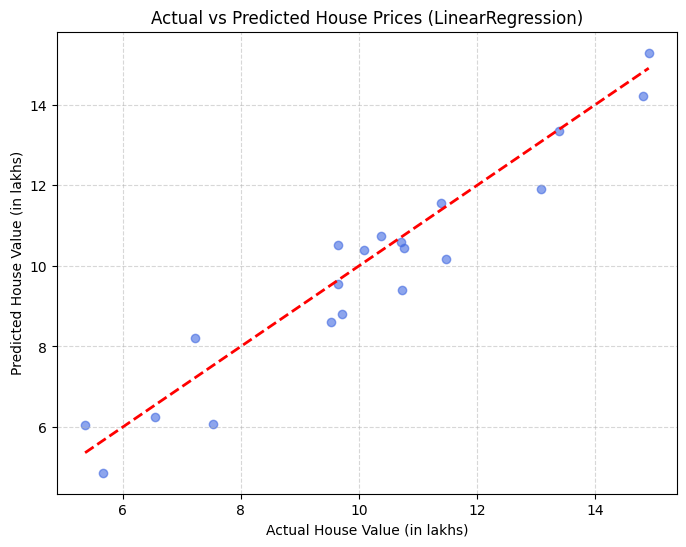

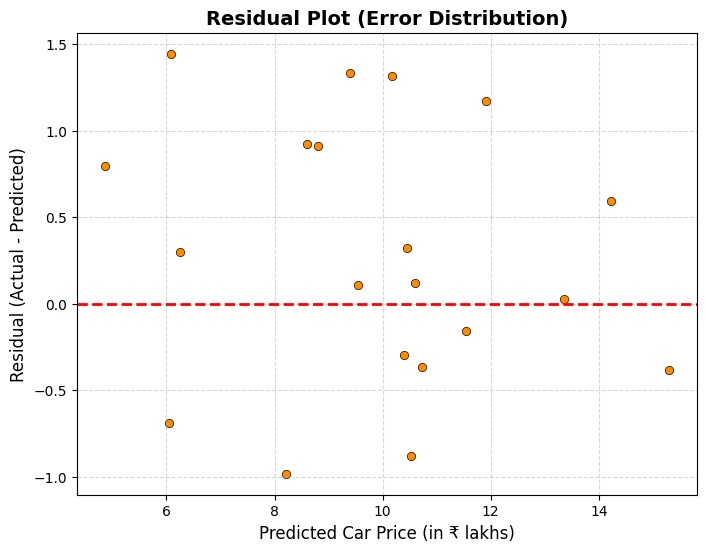

In [13]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
df=pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\car_price_data.csv") # File Path
df=pd.get_dummies(df,columns=['transmission','fuel_type'],drop_first=True) #making dummy
#print(df.columns)
X=df[['mileage','engine_size','seats','year','transmission_Manual','fuel_type_Electric', 'fuel_type_Hybrid','fuel_type_Petrol']] # data 
Y=df['price'] # Target
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
model =LinearRegression()  # Linear Regression
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))
scores = cross_val_score(model, X, Y, cv=5,scoring='r2')
print("\nCross-validation scores:", scores)
print("Average CV accuracy:", scores.mean())
# Testing Value 
new_car = pd.DataFrame({       
'mileage': [20, 35, 30],
'engine_size': [1000, 1500, 2000],
'seats': [3, 4, 5],
'year': [2020, 2022, 2021],
'transmission_Manual': [0, 1, 1],
'fuel_type_Electric':[0,0,1],
'fuel_type_Hybrid':[1,0,0],
'fuel_type_Petrol':[0,1,0]
}) 
new_car_predictions = model.predict(new_car)
new_car['Predicted_Price'] = np.round(new_car_predictions, 2)
print("Predicted car prices:")
print(new_car)
# Prediction
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6,color='royalblue')
plt.xlabel("Actual House Value (in lakhs)")
plt.ylabel("Predicted House Value (in lakhs)")
plt.title("Actual vs Predicted House Prices (LinearRegression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()
# Residual Plots
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, color='darkorange', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel("Predicted Car Price (in ₹ lakhs)", fontsize=12)
plt.ylabel("Residual (Actual - Predicted)", fontsize=12)
plt.title("Residual Plot (Error Distribution)", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

['Electric' 'Hybrid' 'Diesel' 'Petrol']
['Diesel', 'Electric', 'Hybrid', 'Petrol']
